# SF Giants Total Runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',500)

In [2]:
games = pd.read_csv('../Data/Created/GiantsTrain.csv')

In [3]:
val = pd.read_csv('../Data/Created/GiantsVal.csv')

In [4]:
# features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_runs','v_ops','h_ops','home_team','visitor_team']
features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_ops','h_ops','v_roll_rbis','v_roll_tbs','v_bb_rat','v_sb_rat','h_bb_rat','h_sb_rat','v_k_rat','h_k_rat','v_runs','home_team','visitor_team','park_id']
X = games[features]
y = games['total']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2023)

In [6]:
categorical_columns = ['home_team', 'visitor_team','park_id']

ct = ColumnTransformer(
    transformers=[
        ('oh', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [7]:
pipe_tot = Pipeline([
    ('ct', ct),
    ('rf', LinearRegression())
])

In [8]:
%%time
pipe_tot.fit(X_train, y_train)

CPU times: user 15.1 ms, sys: 4.5 ms, total: 19.6 ms
Wall time: 13.6 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['home_team', 'visitor_team',
                                                   'park_id'])])),
                ('rf', LinearRegression())])

In [9]:
pipe_tot.score(X_val, y_val)

0.8552759912304931

In [10]:
preds = pipe_tot.predict(X_val)
preds = pd.DataFrame(preds)
# preds.to_csv('../Data/Created/TotalPreds.csv', index = False)

In [11]:
file_name = '../Models/TotalRuns.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(pipe_tot, file)

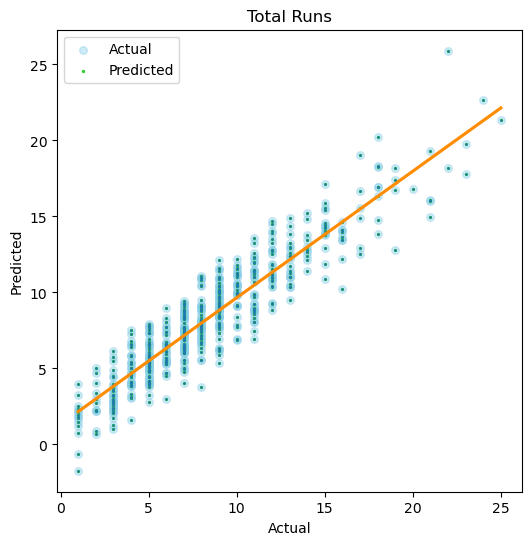

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, preds, color='skyblue', label='Actual',alpha=.4, s=30)
plt.scatter(y_val, preds, color='limegreen', label='Predicted', s=2)
sns.regplot(x=y_val, y =preds, scatter_kws={'s': 1}, line_kws={'color':'darkorange'}, ci=None)
plt.title('Total Runs')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();